In [61]:
# RNN

In [62]:
import math
import numpy as np
import matplotlib.pyplot as plt
from gympy.layers import Tanh, Softmax, Linear, Relu, Sigmoid
from gympy.networks import RNN, DataSet
from gympy.optimizers import SGD, Adam
from gympy.loss import CategoricalCrossEntropy, MeanSquaredError

In [63]:
sin_wave = np.array([math.sin(0.5*x) for x in np.arange(200)])

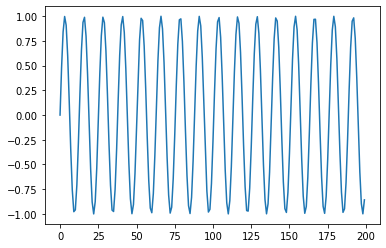

In [64]:
plt.plot(sin_wave)

(185, 1, 15)
(185, 1, 1)
185


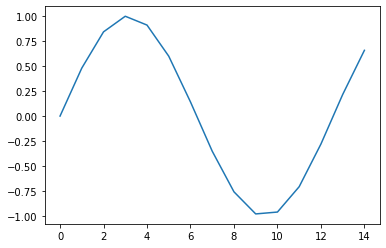

In [65]:
data = DataSet()
data.from_timeseries(sin_wave.reshape(1,-1),len_seq=15)
print(data.x.shape)
print(data.y.shape)
print(data.batch_size)
plt.plot(data.x[0,:,:].reshape(-1))

In [66]:
rnn = RNN(
    n_input=1, 
    n_hidden=10,
    n_output=1, 
    layer_hidden=Tanh,
    layer_output=Linear, 
    loss=MeanSquaredError(), 
    optimizer=SGD(learning_rate=0.1),
    truncate=5
)

rnn.type


<RnnEnum.many_one: 'many_one'>

In [67]:
y,a =rnn.forward(data.x[0,:,:])
print(y.shape, a.shape)

(1, 15) (10, 15)


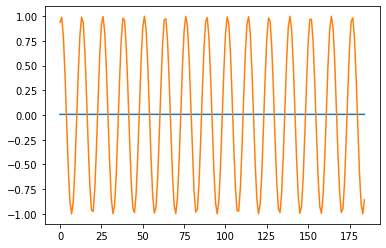

In [68]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)
plt.plot(data.y.reshape(-1))

In [69]:
data.x[0,:,:]

array([[ 0.        ,  0.47942554,  0.84147098,  0.99749499,  0.90929743,
         0.59847214,  0.14112001, -0.35078323, -0.7568025 , -0.97753012,
        -0.95892427, -0.70554033, -0.2794155 ,  0.21511999,  0.6569866 ]])

In [70]:
rnn.get_loss(data.x[0,:,:],data.y[0,:,:])

[[0.00700073]] [[0.93799998]]


0.8667595927324352

In [71]:
rnn.train_dataset(data,show=1, n_epochs=6)
plt.plot(rnn.cost)

0 cost 0.8667595927324352 iter 0
0 cost 0.4908821440034379 iter 150
0 cost 0.5532244824565535 iter 185
1 cost 0.02474476712673944 iter 300
1 cost 0.07904358360720938 iter 370
2 cost 0.35062528804445015 iter 450
2 cost 0.07478353033779483 iter 555
3 cost 0.27566025945567 iter 600


/opt/anaconda3/envs/gympy/lib/python3.8/site-packages/autograd/tracer.py:48: RuntimeWarning: overflow encountered in exp
  return f_raw(*args, **kwargs)
/Users/scuervo91/Documents/dev/gympy/gympy/layers/functions.py:15: RuntimeWarning: invalid value encountered in true_divide
  return (np.exp(x)-np.exp(-x))/(np.exp(x)+np.exp(-x))


3 cost nan iter 740
4 cost nan iter 750
4 cost nan iter 900
4 cost nan iter 925


KeyboardInterrupt: 

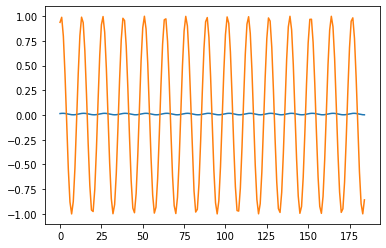

In [ ]:
y_pred = rnn.predict_batch(data.x)
plt.plot(y_pred)
plt.plot(data.y.reshape(-1))